#### GTZAN Dataset 샘플음성 데이터 Waveshow,Augmentation 적용

In [3]:
# %pip install matplotlib
# %pip install Ipython
# %pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import IPython
import random

In [2]:
file_path = '../99_Studyfile/02_Sample/blues.00001.wav'
data, sr = librosa.load(file_path, sr=22050)    # 오디오파일 경로, 샘플링 주파수

#### 음성 데이터 STFT 변환

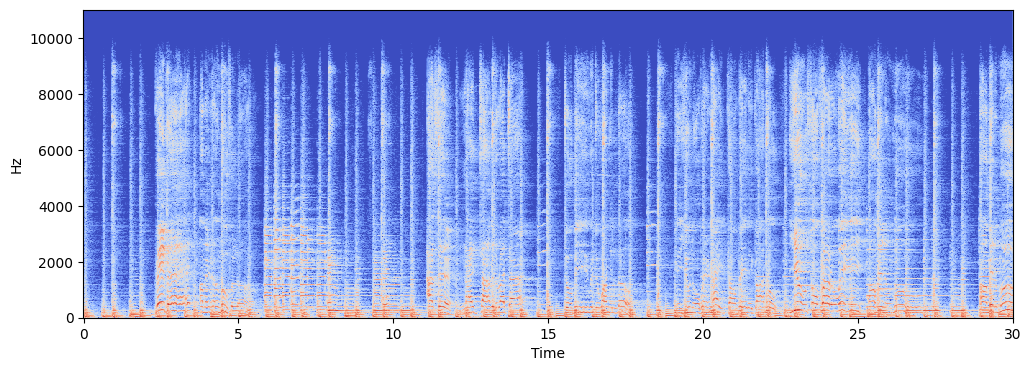

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [4]:
# 1. STFT 계산
stft = librosa.stft(data)

# 2. STFT --> dB로 변환
stft_db = librosa.amplitude_to_db(abs(stft))

# 3. STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off') 타임라인 삭제
plt.savefig('../99_Studyfile/03_Output/STFT_original.png', bbox_inches='tight',pad_inches=0)
plt.close()

#### 0-10초 구간 파형 추출 이미지 노이즈 값 추가 Data Augmentaiton 적용

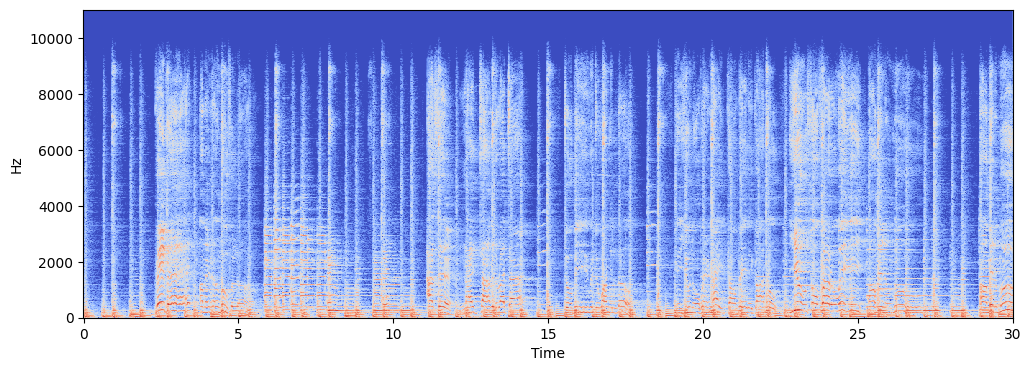

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [5]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_selection_stft = data[start_sample : end_sample]

# 0-10초 구간 STFT 계산
stft_temp = librosa.stft(data_selection_stft)

# 노이즈 추가
plt.figure(figsize=(12,4))
librosa.display.waveshow(data_selection_stft, color='purple')
# plt.axis('off') 타임라인 삭제
plt.savefig('../99_Studyfile/03_Output/stft_0_10.png', bbox_inches='tight',pad_inches=0)
plt.close()

#### 0-10초 STFT 노이즈 추가

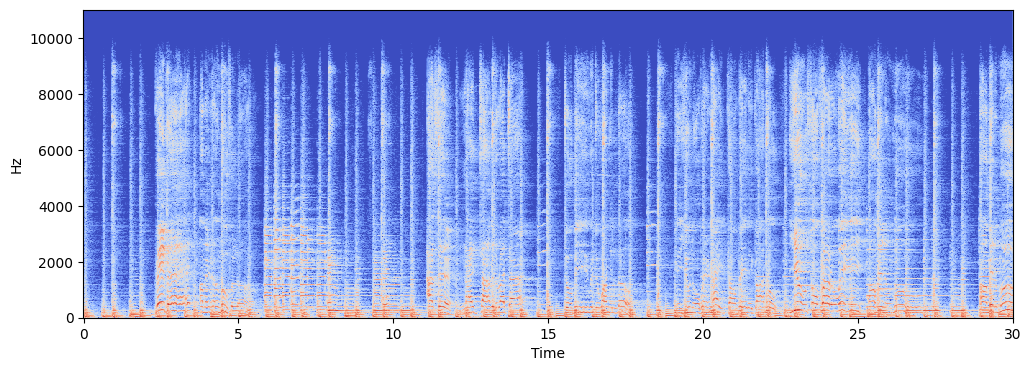

<Figure size 1200x400 with 0 Axes>

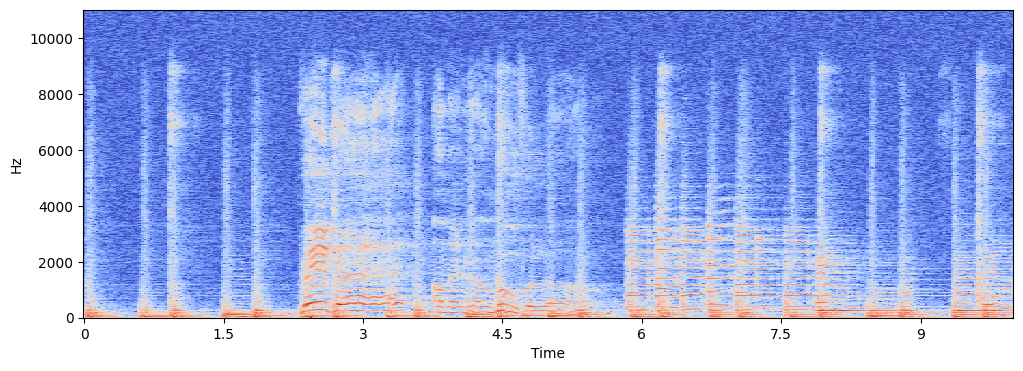

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
noise = 0.005 * np.random.rand(*data_selection_stft.shape)
augmented_data_selection = data_selection_stft + noise

# STFT 계산
augmented_stft = librosa.stft(augmented_data_selection)

# STFT 결과 -> dB로 변환
augmented_stft_db = librosa.amplitude_to_db(abs(augmented_stft))

# 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(augmented_stft_db,sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig('../99_Studyfile/03_Output/STFT_0_10_aug_noise.png',bbox_inches='tight', pad_inches=0)
plt.close()

#### Stretching 추가하여 이미지 저장

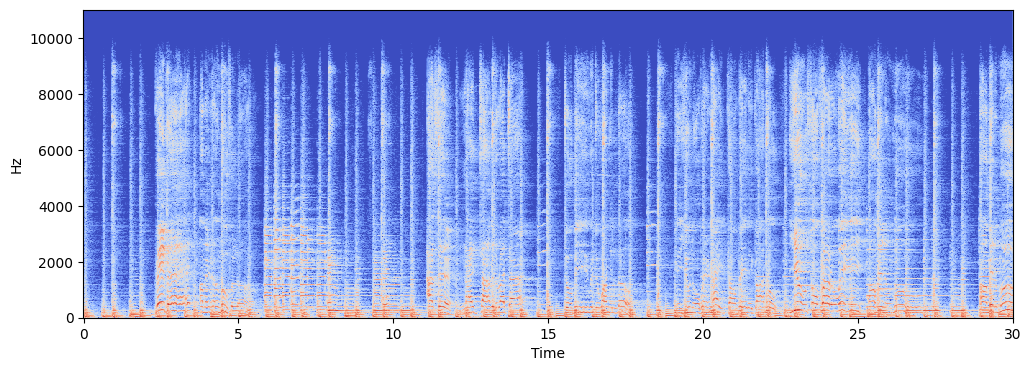

<Figure size 1200x400 with 0 Axes>

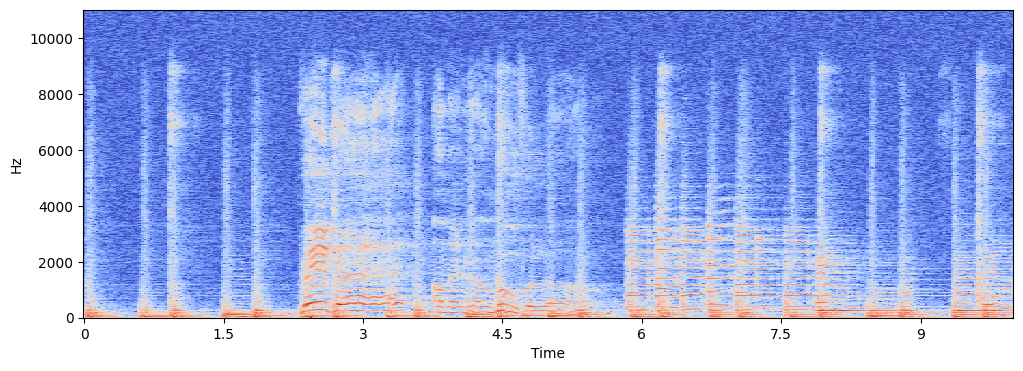

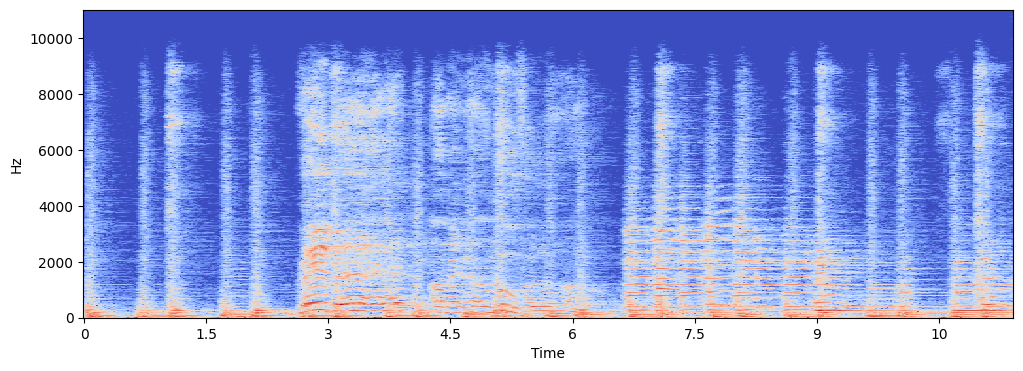

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
rate = 0.8 + np.random.random() * 0.4  # 0.8 - 1.2 사이의 랜던함 비율 Time Stretching
streched_data_selection = librosa.effects.time_stretch(data_selection_stft, rate=rate)

# STFT 계산
streched_stft = librosa.stft(streched_data_selection)

# STFT 결과 -> dB로 변환
streched_stft_db = librosa.amplitude_to_db(abs(streched_stft))

# 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(streched_stft_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig('../99_Studyfile/03_Output/STFT_0_10_aug_stretch.png', bbox_inches='tight', pad_inches=0)